In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

## Dictionnaries of performance

In [23]:
human_performance = {'alien': 6875.,
                     'atlantis': 29028.,
                     'boxing': 4.3,
                     'breakout': 31.8,
                     'pong': 9.3,
                     'qbert': 13455.,
                     'space_invaders': 1652.,}

In [25]:
random_performance = {'alien': 227.8,
                      'atlantis': 12850.,
                      'boxing': 0.1,
                      'breakout': 1.7,
                      'pong': -20.7,
                      'qbert': 163.9,
                      'space_invaders': 148.,}

## Functions

In [4]:
def df_results(history, human_perf: float, random_perf: float,
               step_test: int, begin_test: int, end_test: int,
               name_model: str='model'):
    
    """
    """
    points_test = [i for i in range(begin_test, end_test + step_test, step_test)]
    avg_reward_perc_human = [(k-random_perf)/(human_perf-random_perf)*100 for k in history['avg_reward']]
    avg_reward_perc_rand = [k/random_perf*100 for k in history['avg_reward']]
    l_name_model = [name_model]*len(points_test)
    
    return pd.DataFrame(data={
        'name_model': l_name_model,
        'points_test': points_test,
        'avg_reward': history['avg_reward'],
        'avg_Q': history['avg_Q'],
        'avg_reward_normalized_human': avg_reward_perc_human,
        'avg_reward_perc_rand': avg_reward_perc_rand,
    })

## Visualization of agents' performance

In [17]:
spaceinvaders_history = pickle.load(open('data/space_invaders_T305000_strtTrain200_steps10000.p', 'rb'))

In [18]:
spaceinvaders_reward = spaceinvaders_history['reward']
spaceinvaders_avg_reward = spaceinvaders_history['avg_reward']
spaceinvaders_avg_Q = spaceinvaders_history['avg_Q']

In [19]:
df_spaceinvaders = df_results(spaceinvaders_history, human_performance['space_invaders'], random_performance['space_invaders'],
                    step_test=10000, begin_test=10000, end_test=300000,
                    name_model='Rainbow_spaceinvaders')

Text(0, 0.5, 'Normalized reward')

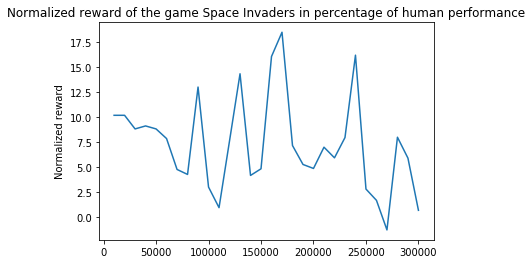

In [20]:
plt.plot(df_spaceinvaders['points_test'], df_spaceinvaders['avg_reward_normalized_human'])
plt.title('Normalized reward of the game Space Invaders in percentage of human performance')
plt.ylabel('Normalized reward')

Text(0, 0.5, 'Reward in percentage of random performance')

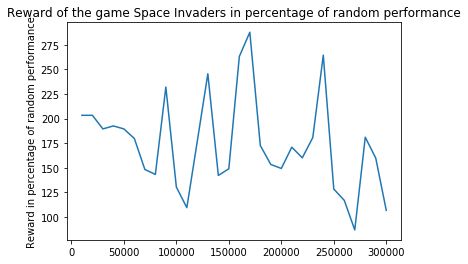

In [21]:
plt.plot(df_spaceinvaders['points_test'], df_spaceinvaders['avg_reward_perc_rand'])
plt.title('Reward of the game Space Invaders in percentage of random performance')
plt.ylabel('Reward in percentage of random performance')

In [8]:
alien_history = pickle.load(open('data/alien_T305000_strtTrain200_steps10000.p', 'rb'))

In [9]:
alien_reward = alien_history['reward']
alien_avg_reward = alien_history['avg_reward']
alien_avg_Q = alien_history['avg_Q']

Text(0, 0.5, 'Reward')

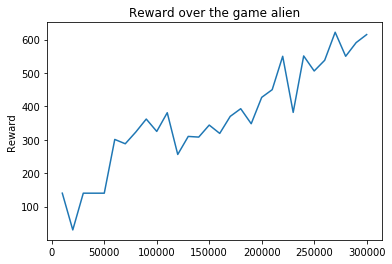

In [10]:
plt.plot([i for i in range(10000, 310000, 10000)], alien_avg_reward)
plt.title('Reward over the game alien')
plt.ylabel('Reward')

In [11]:
df_alien = df_results(alien_history, human_performance['alien'], random_performance['alien'],
                    step_test=10000, begin_test=10000, end_test=300000,
                    name_model='Rainbow_alien')

Text(0, 0.5, 'Normalized reward')

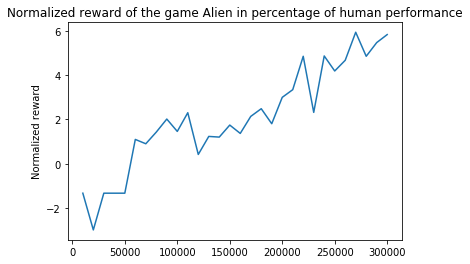

In [12]:
plt.plot(df_alien['points_test'], df_alien['avg_reward_normalized_human'])
plt.title('Normalized reward of the game Alien in percentage of human performance')
plt.ylabel('Normalized reward')

Text(0, 0.5, 'Reward in percentage of random performance')

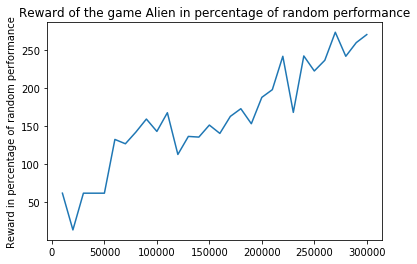

In [13]:
plt.plot(df_alien['points_test'], df_alien['avg_reward_perc_rand'])
plt.title('Reward of the game Alien in percentage of random performance')
plt.ylabel('Reward in percentage of random performance')

In [22]:
qbert_history = pickle.load(open('data/qbert_T505000_strtTrain200_steps10000.p', 'rb'))

In [27]:
df_qbert = df_results(qbert_history, human_performance['qbert'], random_performance['qbert'],
                    step_test=10000, begin_test=10000, end_test=500000,
                    name_model='Rainbow_qbert')

Text(0, 0.5, 'Normalized reward')

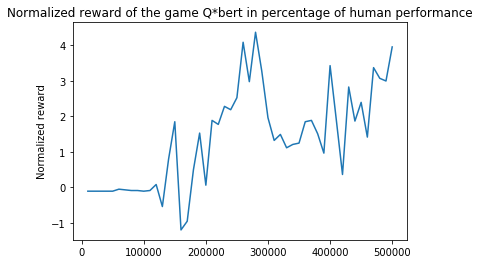

In [28]:
plt.plot(df_qbert['points_test'], df_qbert['avg_reward_normalized_human'])
plt.title('Normalized reward of the game Q*bert in percentage of human performance')
plt.ylabel('Normalized reward')

Text(0, 0.5, 'Reward in percentage of random performance')

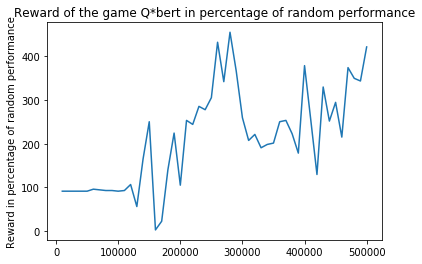

In [29]:
plt.plot(df_qbert['points_test'], df_qbert['avg_reward_perc_rand'])
plt.title('Reward of the game Q*bert in percentage of random performance')
plt.ylabel('Reward in percentage of random performance')